# CoinGecko REST API: extracting crypto currency data

## Libraries and settings

In [1]:
# Libraries
import os
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,"")

import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: /workspaces/data_ingestion/03_CoinGecko_WebAPI


## Get data

In [2]:
# Simple price endpoint with the required parameters
cg.get_price(ids='bitcoin', vs_currencies='usd')

{'bitcoin': {'usd': 76202}}

In [3]:
# Multiple arguments (USD)
cg.get_price(ids=['bitcoin', 'near', 'ethereum', 'dogecoin'], vs_currencies='usd')

{'bitcoin': {'usd': 76283},
 'dogecoin': {'usd': 0.206967},
 'ethereum': {'usd': 3031.81},
 'near': {'usd': 4.33}}

In [4]:
# Multiple arguments (USD & EUR)
cg.get_price(ids=['bitcoin', 'near', 'ethereum, dogecoin'], vs_currencies=['usd', 'eur'])

{'bitcoin': {'usd': 76283, 'eur': 71170},
 'dogecoin': {'usd': 0.206967, 'eur': 0.193093},
 'ethereum': {'usd': 3031.81, 'eur': 2828.58},
 'near': {'usd': 4.33, 'eur': 4.04}}

In [5]:
# Pass optional parameters as defined in the API doc (https://www.coingecko.com/api/docs/v3)
data = cg.get_price( ids='bitcoin, near, ethereum, dogecoin', 
                     vs_currencies='usd', 
                     include_market_cap='true', 
                     include_24hr_vol='true', 
                     include_24hr_change='true', 
                     include_last_updated_at='true')
data

{'bitcoin': {'usd': 76284,
  'usd_market_cap': 1508541848365.613,
  'usd_24h_vol': 38147000178.670166,
  'usd_24h_change': -0.2509166176076118,
  'last_updated_at': 1731175168},
 'dogecoin': {'usd': 0.206967,
  'usd_market_cap': 30320823538.02253,
  'usd_24h_vol': 4876268700.45758,
  'usd_24h_change': 7.123194220402978,
  'last_updated_at': 1731175161},
 'ethereum': {'usd': 3031.81,
  'usd_market_cap': 364517066367.79987,
  'usd_24h_vol': 30998808711.69688,
  'usd_24h_change': 3.7628841431058997,
  'last_updated_at': 1731175168},
 'near': {'usd': 4.33,
  'usd_market_cap': 5270598750.615565,
  'usd_24h_vol': 398879457.47771126,
  'usd_24h_change': 2.121774450454679,
  'last_updated_at': 1731175163}}

In [6]:
# Extract single values
names = list(data.keys())
print(names)
print("----------------")

# Price of the first element in list
print(names[0])
print(data[names[0]]["usd"])

['bitcoin', 'dogecoin', 'ethereum', 'near']
----------------
bitcoin
76284


## Extract and plot data

In [7]:
# Keys from dictionary
names = list(data.keys())

# Get values from dictionary and format to 2 decimal places
values = []
for i in range(len(names)):
    vals = data[names[i]]["usd"]
    formatted_val = f'{vals:.2f}'
    values.append(formatted_val)

# Create DataFrame
df = pd.DataFrame({
    'Name': names,
    'Value': values})

# Convert 'Value' column to numeric
df['Value'] = pd.to_numeric(df['Value'])

# Sort DataFrame by 'Value' in descending order
df = df.sort_values(by='Value', ascending=False)

print(df)

       Name     Value
0   bitcoin  76284.00
2  ethereum   3031.81
3      near      4.33
1  dogecoin      0.21


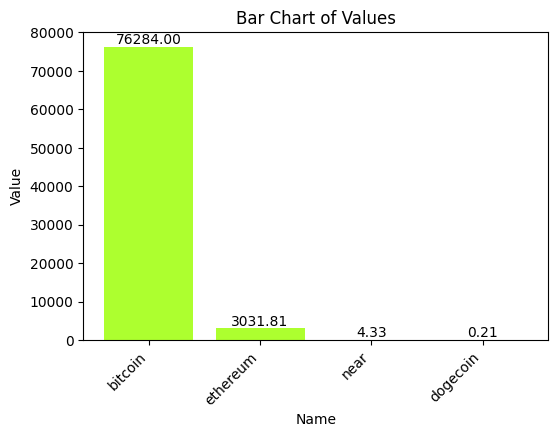

In [8]:
# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(df['Name'], df['Value'], color='greenyellow')
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Bar Chart of Values')
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 0.05, f'{yval:.2f}', 
             ha='center', 
             va='bottom')
plt.show()

### Aufgabe: Arbeiten mit der CoinGecko API und Umwandlung von verschachtelten Datenstrukturen in ein DataFrame
#### Beschreibung

- In dieser Aufgabe sollst du Daten für mehrere Kryptowährungen (z.B. Bitcoin, Ethereum, Dogecoin) von der CoinGecko-API abrufen und in ein DataFrame umwandeln. Die API liefert die Daten in einem Dictionary, das du analysieren und in eine tabellarische Form konvertieren musst.
Anforderungen

    1. Abrufen der Daten: Verwende die CoinGecko-API, um Daten für die Kryptowährungen Bitcoin, Ethereum und Dogecoin in USD abzurufen.
        - Die API soll zusätzlich die Marktkapitalisierung, das Handelsvolumen und die 24-Stunden-Preisänderung liefern.

    2. Struktur verstehen: Analysiere die zurückgegebenen Daten. Die API liefert die Daten als Dictionary mit mehreren verschachtelten Ebenen. Achte darauf, wie die Daten organisiert sind.

    3. Daten umwandeln: Wandle die Daten in ein Pandas DataFrame um, sodass jede Kryptowährung eine eigene Zeile hat und die Informationen zu Preis, Marktkapitalisierung, Handelsvolumen und Preisänderung in separaten Spalten stehen.

    4. Daten anzeigen: Sortiere das DataFrame nach dem Preis und zeige es an.

#### Lösungsschritte

In [2]:
# Schritt 1: Bibliotheken importieren
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Schritt 2: Verbindung zur CoinGecko-API herstellen
cg = CoinGeckoAPI()

# Schritt 3: Abrufen der Daten für Bitcoin, Ethereum und Dogecoin mit zusätzlichen Informationen
# (Marktkapitalisierung, Handelsvolumen und 24-Stunden-Preisänderung)
data = cg.get_price(
    ids=['bitcoin', 'ethereum', 'dogecoin'],
    vs_currencies='usd',
    include_market_cap='true',
    include_24hr_vol='true',
    include_24hr_change='true'
)

# Schritt 4: Analyse der Datenstruktur
# data ist ein verschachteltes Dictionary, das die Daten für jede Kryptowährung enthält.
# Wir können die Struktur prüfen, indem wir das Dictionary ausgeben.
print("Datenstruktur des API-Antworts (Dictionary):")
print(data)

Datenstruktur des API-Antworts (Dictionary):
{'bitcoin': {'usd': 79864, 'usd_market_cap': 1578951613710.8547, 'usd_24h_vol': 64068741393.891396, 'usd_24h_change': 4.644471656517865}, 'dogecoin': {'usd': 0.247907, 'usd_market_cap': 36292342888.28991, 'usd_24h_vol': 8843411323.753397, 'usd_24h_change': 20.72207513763627}, 'ethereum': {'usd': 3207.12, 'usd_market_cap': 386176513982.4712, 'usd_24h_vol': 38883400043.315, 'usd_24h_change': 5.46057774650883}}


In [3]:
# Schritt 5: Umwandeln in ein DataFrame
# Jede Kryptowährung wird als Zeile im DataFrame dargestellt, und wir extrahieren die relevanten Informationen.
df = pd.DataFrame(data).T  # Transponieren, damit die Kryptowährungen als Zeilen angezeigt werden

# Schritt 6: Spalten umbenennen
df.columns = ['Price (USD)', 'Market Cap (USD)', '24h Volume (USD)', '24h Change (%)']

# Schritt 7: Sortieren des DataFrames nach Preis in absteigender Reihenfolge
df = df.sort_values(by='Price (USD)', ascending=False)

# Schritt 8: Ausgabe des DataFrames
print("\nTabellarische Darstellung der Kryptowährungsdaten:")
print(df)


Tabellarische Darstellung der Kryptowährungsdaten:
           Price (USD)  Market Cap (USD)  24h Volume (USD)  24h Change (%)
bitcoin   79864.000000      1.578952e+12      6.406874e+10        4.644472
ethereum   3207.120000      3.861765e+11      3.888340e+10        5.460578
dogecoin      0.247907      3.629234e+10      8.843411e+09       20.722075


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-09 17:59:29
Python Version: 3.11.10
-----------------------------------
